imports

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import pandas as pd
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, Rotator
from sklearn.manifold import MDS

In [37]:
N = 1000
D = 5000
step = 10
data = pd.DataFrame(columns=['dim', 'min', 'max', 'mean'])

In [ ]:
for d in tqdm(range(1, D, step)):
    points = np.random.rand(N, d)
    distances = pdist(points, metric='euclidean')
    data.loc[d] = [d, distances.min(), distances.max(), distances.mean()]

100%|██████████| 500/500 [02:16<00:00,  3.67it/s]


In [39]:
data.head()

,dim,min,max,mean
1,1.0,0.000002,0.998752,0.343634
11,11.0,0.262230,2.349463,1.330895
21,21.0,0.722218,2.994038,1.856430
31,31.0,1.068997,3.372982,2.264037
41,41.0,1.459511,3.661619,2.600232


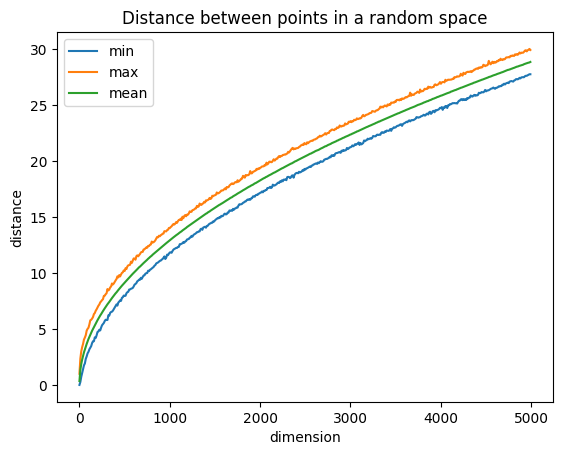

In [40]:
plt.plot(data['dim'], data['min'], label='min')
plt.plot(data['dim'], data['max'], label='max')
plt.plot(data['dim'], data['mean'], label='mean')
plt.xlabel('dimension')
plt.ylabel('distance')
plt.title('Distance between points in a random space')
plt.legend()
plt.show()

In [42]:
data2 = pd.DataFrame(columns=['dim', 'min', 'max', 'mean'])

In [43]:
for d in tqdm(range(1, D, step)):
    points = np.random.rand(N, d)
    distances = pdist(points, metric='cityblock')
    data2.loc[d] = [d, distances.min(), distances.max(), distances.mean()]

100%|██████████| 500/500 [03:56<00:00,  2.11it/s]


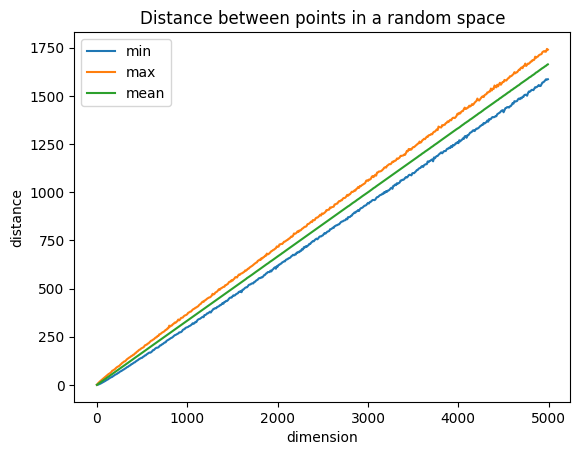

In [44]:
plt.plot(data2['dim'], data2['min'], label='min')
plt.plot(data2['dim'], data2['max'], label='max')
plt.plot(data2['dim'], data2['mean'], label='mean')
plt.xlabel('dimension')
plt.ylabel('distance')
plt.title('Distance between points in a random space')
plt.legend()
plt.show()

In [53]:
points = np.random.rand(10000, 25)
data3 = pd.DataFrame(points)
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.667874,0.892931,0.195517,0.865667,0.797757,0.528105,0.252005,0.655333,0.987269,0.586952,...,0.767509,0.152300,0.840898,0.608300,0.612212,0.350021,0.467025,0.783480,0.734025,0.496367
1,0.503646,0.889841,0.801980,0.076180,0.533908,0.860359,0.570038,0.555632,0.739171,0.838479,...,0.827726,0.486342,0.555970,0.033736,0.043656,0.183863,0.079165,0.165145,0.657939,0.842549
2,0.051911,0.134724,0.261113,0.339937,0.012282,0.779349,0.407755,0.469732,0.065661,0.535358,...,0.437538,0.439191,0.445174,0.941758,0.969212,0.955405,0.547833,0.503555,0.423963,0.745569
3,0.517145,0.843559,0.768258,0.640844,0.442654,0.449370,0.472368,0.765739,0.321947,0.865389,...,0.290128,0.004241,0.317970,0.549751,0.321383,0.689061,0.160475,0.074402,0.795872,0.983689
4,0.759713,0.826210,0.792595,0.351592,0.942673,0.813150,0.805514,0.325076,0.262019,0.195090,...,0.802368,0.472192,0.674151,0.451120,0.325943,0.543670,0.452588,0.159920,0.319688,0.270369


In [ ]:
stdX = StandardScaler().fit_transform(data3)

In [55]:
stdX

array([[ 0.57954125,  1.37221283, -1.06051061, ...,  0.97905091,
         0.826652  , -0.01141791],
       [ 0.01050121,  1.36148659,  1.03924332, ..., -1.15700551,
         0.56178351,  1.19794938],
       [-1.55473279, -1.259849  , -0.83340017, ...,  0.01204371,
        -0.25273186,  0.8591532 ],
       ...,
       [-0.20214238, -1.68037195,  0.60583902, ...,  0.15708724,
        -0.08184991, -1.39213537],
       [-0.74045201, -0.85289143,  1.23661651, ..., -0.24126952,
        -1.65168872,  0.76988246],
       [-1.16032961,  1.60871519,  0.11478016, ...,  0.94391946,
         0.83909665, -0.6633798 ]], shape=(10000, 25))

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stdX)

In [57]:
principalComponents

array([[-1.40623211,  0.79153166],
       [-1.32810405,  0.49120685],
       [ 1.09411143,  1.16457202],
       ...,
       [ 0.83640787,  1.14608458],
       [-2.07938033, -1.16007568],
       [-0.00465369,  1.16629624]], shape=(10000, 2))

In [61]:
principalDf = pd.DataFrame(data=principalComponents, columns=['main_comp_1', 'main_comp_2'])
principalDf.head()

,main_comp_1,main_comp_2
0,-1.406232,0.791532
1,-1.328104,0.491207
2,1.094111,1.164572
3,-0.024323,1.478704
4,0.043590,-0.491710


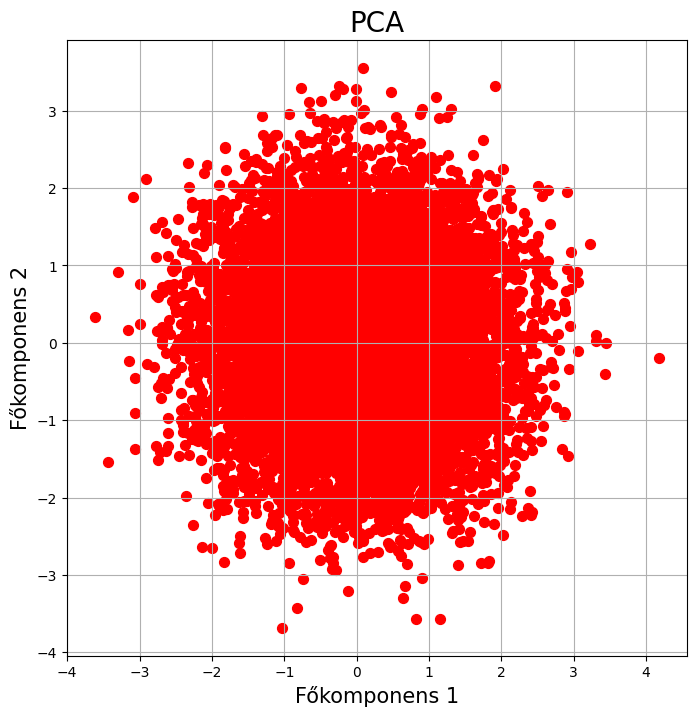

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Főkomponens 1', fontsize = 15)
ax.set_ylabel('Főkomponens 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
ax.scatter(principalDf['main_comp_1']
            , principalDf['main_comp_2']
            , c = 'r'
            , s = 50)
ax.grid()

In [143]:
clust_1 = np.random.normal(loc=0.25, scale=0.15, size=(1000, 4))
clust_2 = np.random.normal(loc=0.75, scale=0.2, size=(1000, 4))

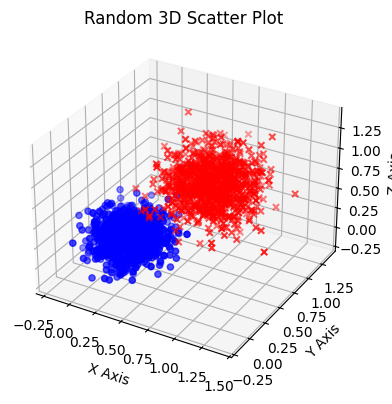

In [144]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clust_1[:, 0], clust_1[:, 1], clust_1[:, 2], c='blue', marker='o')
ax.scatter(clust_2[:, 0], clust_2[:, 1], clust_2[:, 2], c='red', marker='x')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Random 3D Scatter Plot')

plt.tight_layout()
plt.show()

In [145]:
data_c1 = pd.DataFrame(clust_1, columns=['x', 'y', 'z', 'w'])
data_c1['cluster'] = 1
data_c2 = pd.DataFrame(clust_2, columns=['x', 'y', 'z', 'w'])
data_c2['cluster'] = 2
data4 = pd.concat([data_c1, data_c2], ignore_index=True)
data4.head()

,x,y,z,w,cluster
0,0.534646,0.312204,0.408551,0.174611,1
1,0.186836,0.038819,0.142509,0.379376,1
2,-0.067243,0.187390,0.466958,0.179641,1
3,0.212519,0.113776,0.168039,0.220777,1
4,0.156503,0.378769,0.340016,0.515887,1


In [146]:
stdX = StandardScaler().fit_transform(data4[['x', 'y', 'z', 'w']])
pca = PCA(n_components=3)
princ_comps = pca.fit_transform(stdX)

In [147]:
pcdf = pd.DataFrame(data = princ_comps, columns = ['Főkomponens 1', 'Főkomponens 2', 'Főkomponens 3'])
data4_2d = pd.concat([pcdf, data4[['cluster']]], axis = 1)
data4_2d.head()

,Főkomponens 1,Főkomponens 2,Főkomponens 3,cluster
0,-0.923940,0.844065,-0.256439,1
1,-2.052308,-0.155644,0.410136,1
2,-2.020154,-0.287650,0.842181,1
3,-2.103751,0.092586,0.096554,1
4,-1.001284,-0.748011,0.333490,1


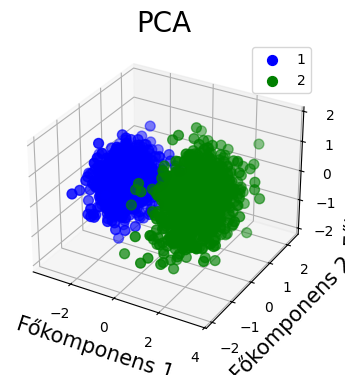

In [148]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlabel('Főkomponens 1', fontsize = 15)
ax.set_ylabel('Főkomponens 2', fontsize = 15)
ax.set_zlabel('Főkomponens 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [1, 2]
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data4_2d['cluster'] == target
    ax.scatter(data4_2d.loc[indicesToKeep, 'Főkomponens 1']
               , data4_2d.loc[indicesToKeep, 'Főkomponens 2']
               , data4_2d.loc[indicesToKeep, 'Főkomponens 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

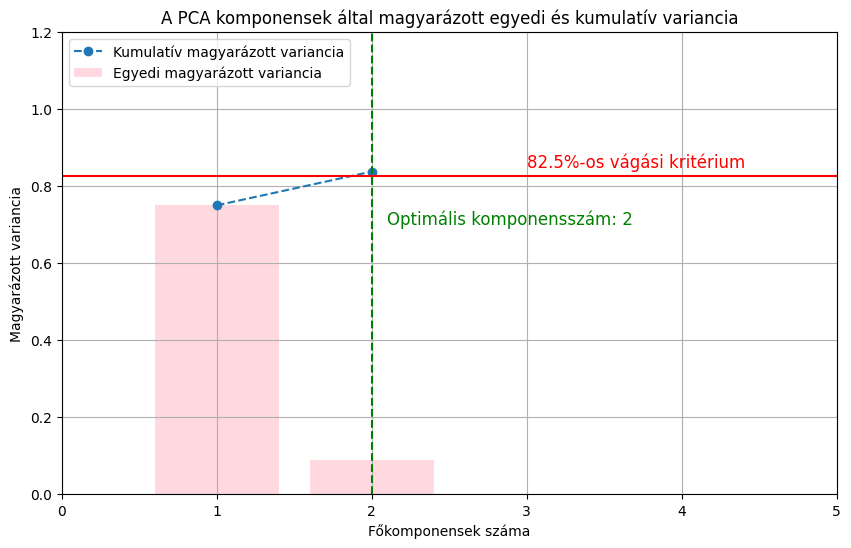

In [164]:
# komponens szám kiválasztása

# adatok PCA-val leképezve
pca=PCA(n_components=2)
pca.fit(stdX)

#Jó stratégia az, ha kiválasztjuk azon dimenziók számát, amelyeknél a kumulatív magyarázott variancia meghalad egy küszöbértéket, például 0,95-öt (95%).
explained_variance_ratio  = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# ábrázolás:
plt.figure(figsize=(10, 6))
bar = plt.bar(range(1, len(cumulative_explained_variance) + 1), explained_variance_ratio, alpha=0.6, color='pink', label='Egyedi magyarázott variancia')

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Kumulatív magyarázott variancia')
plt.title('A PCA komponensek által magyarázott egyedi és kumulatív variancia')
plt.xlabel('Főkomponensek száma')
plt.ylabel('Magyarázott variancia')
plt.axis([0, 5, 0, 1.2])
plt.legend(loc='upper left')
plt.grid(True)
plt.axhline(y=0.825, color='r', linestyle='-')
plt.text(3, 0.85, '82.5%-os vágási kritérium', color = 'red', fontsize=12)

# Az adatok szórásának 95%-ának megőrzéséhez szükséges főkomponensek minimális száma:
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance <0.825]) + 1

plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(2.1, 0.7, f'Optimális komponensszám: {optimal_num_components}', color = 'green', fontsize=12)
plt.show()

In [165]:
pca.components_

array([[ 0.4980498 ,  0.50034374,  0.50152402,  0.50007619],
       [ 0.67493141, -0.43172903,  0.2850688 , -0.52613061]])

In [166]:
pca.explained_variance_ratio_

array([0.74939125, 0.08786131])

In [170]:
features = ['x','y', 'z', 'w']
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
rotator = Rotator(method='varimax')
varimax_loadings = rotator.fit_transform(pca_loadings)

# Oblimin forgatás a FactorAnalyzer használatával
fa = FactorAnalyzer(n_factors=pca.n_components_, rotation="oblimin")
fa.fit(stdX)
oblimin_loadings = fa.loadings_

# Forgatott eredmények táblázatba foglalása
varimax_df = pd.DataFrame(varimax_loadings, columns=[f'Varimax PC{i+1}' for i in range(pca.n_components_)], index=features)
oblimin_df = pd.DataFrame(oblimin_loadings, columns=[f'Oblimin PC{i+1}' for i in range(pca.n_components_)], index=features)

# Eredmények összevonása
loadings_df = pd.DataFrame(
    pca_loadings,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)
combined_df = pd.concat([loadings_df, varimax_df, oblimin_df], axis=1)
print("Eredeti és forgatott töltősúlyok:")
combined_df

Eredeti és forgatott töltősúlyok:


/Users/tothi/pysrc/pemik/nfgt/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,PC1,PC2,Varimax PC1,Varimax PC2,Oblimin PC1,Oblimin PC2
x,0.862513,0.400218,0.355420,0.881918,0.817981,-0.124533
y,0.866486,-0.256005,0.807185,0.405941,0.813234,0.028667
z,0.868530,0.169039,0.517939,0.717396,0.819179,-0.042142
w,0.866022,-0.311983,0.845137,0.364790,0.821179,0.138025


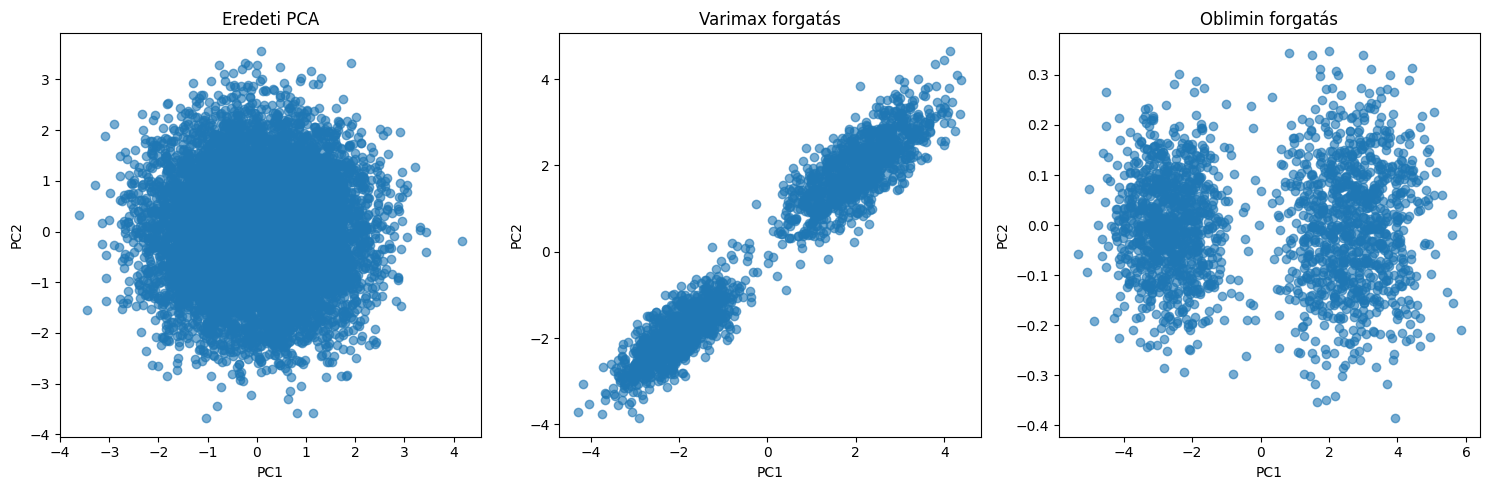

In [171]:
# Vizualizáció
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eredeti PCA vizualizáció
axes[0].scatter(principalComponents[:, 0], principalComponents[:, 1], alpha=0.6)
axes[0].set_title("Eredeti PCA")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Varimax vetített adatok
varimax_projection = np.dot(stdX, varimax_loadings)
axes[1].scatter(varimax_projection[:, 0], varimax_projection[:, 1], alpha=0.6)
axes[1].set_title("Varimax forgatás")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# Oblimin vetített adatok
oblimin_projection = np.dot(stdX, oblimin_loadings)
axes[2].scatter(oblimin_projection[:, 0], oblimin_projection[:, 1], alpha=0.6)
axes[2].set_title("Oblimin forgatás")
axes[2].set_xlabel("PC1")
axes[2].set_ylabel("PC2")

plt.tight_layout()
plt.show()

In [176]:
data4[features]

,x,y,z,w
0,0.534646,0.312204,0.408551,0.174611
1,0.186836,0.038819,0.142509,0.379376
2,-0.067243,0.187390,0.466958,0.179641
3,0.212519,0.113776,0.168039,0.220777
4,0.156503,0.378769,0.340016,0.515887
...,...,...,...,...
1995,0.604354,0.880255,0.738169,0.577088
1996,0.897822,0.696045,0.779604,0.757743
1997,0.601308,0.947594,0.958348,0.783836
1998,0.981744,0.949564,0.629414,0.558324


In [182]:
mds = MDS(n_components=2, n_init=10, verbose=1)
embeddedX = mds.fit_transform(data4[features])

breaking at iteration 298 with stress 30087.674198393437
breaking at iteration 231 with stress 29223.418757756728
breaking at iteration 274 with stress 30751.80956952467
